Keras implementaion of 'Deep convolutional neural network for the automated detection and diagnosis of seizure using EEG signals', U. Rajendra Acharya, Shu Lih Oh, Yuki Hagiwara, Jen Hong Tan, Hojjat Adeli.  https://www.ncbi.nlm.nih.gov/pubmed/28974302

In [1]:
import glob
import numpy as np

In [2]:
file_sets = ['O', 'N', 'S'] # O-> Set B (Normal ), N-> Set C (Pre-ictal) S-> Set E (Seizure)
label_sets = [1, 2, 3] # 1->Normal, 2->Preictal,  3-> Seizure

In [3]:
# data is in folders 'input/O, input/S' etc.
data=[]
labels = []
for file_set, label in zip(file_sets, label_sets):

    for file in glob.glob('input/'+ file_set +'/*.*'):
        with open(file) as f:
            int_list = [int(x) for x in f]
            data.append(int_list)
            labels.append(label)

In [4]:
data = np.asarray(data)
data.shape

(300, 4097)

In [5]:
data = data.reshape(300, 4097, 1)

In [6]:
labels = np.asarray(labels)
print(labels.shape)

(300,)


In [7]:
# randomize the data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_val, y_train, y_val = train_test_split(data, labels, 
                                                stratify = labels, random_state = 123)

In [10]:
print('x_train shape:', x_train.shape)
print('x_val shape:', x_val.shape)

x_train shape: (225, 4097, 1)
x_val shape: (75, 4097, 1)


In [11]:
def one_hot(labels, n_class = 3):
	""" One-hot encoding """
	expansion = np.eye(n_class)
	y = expansion[:, labels-1].T
	assert y.shape[1] == n_class, "Wrong number of labels!"

	return y

In [12]:
y_train = one_hot(y_train)
y_val = one_hot(y_val)

In [13]:
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In [14]:
model = Sequential()
model.add(Conv1D(filters=4, kernel_size=6, input_shape=x_train.shape[1:3],
                activation='relu'))
model.add(MaxPooling1D(2))

model.add(Conv1D(filters=4, kernel_size=5, activation='linear'))
model.add(LeakyReLU(alpha=.001))
model.add(MaxPooling1D(2))

model.add(Conv1D(filters=10, kernel_size=4, activation='linear'))
model.add(LeakyReLU(alpha=.001))
model.add(MaxPooling1D(2))

model.add(Conv1D(filters=10, kernel_size=4, activation='linear'))
model.add(LeakyReLU(alpha=.001))
model.add(MaxPooling1D(2))

model.add(Conv1D(filters=15, kernel_size=4, activation='linear'))
model.add(LeakyReLU(alpha=.001))
model.add(MaxPooling1D(2))

model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))

model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001),
            metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 4092, 4)           28        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2046, 4)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2042, 4)           84        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 2042, 4)           0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1021, 4)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1018, 10)          170       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1018, 10)          0         
__________

In [15]:
history = model.fit(x_train,y_train, batch_size=3, epochs=150,validation_data=(x_val,y_val) )

Train on 225 samples, validate on 75 samples
Epoch 1/150
225/225 [==============================] - 1s - loss: 3.9691 - acc: 0.3556 - val_loss: 1.6146 - val_acc: 0.3867
Epoch 2/150
225/225 [==============================] - 0s - loss: 1.6290 - acc: 0.4089 - val_loss: 1.8792 - val_acc: 0.3333
Epoch 3/150
225/225 [==============================] - 0s - loss: 1.2413 - acc: 0.4978 - val_loss: 1.1198 - val_acc: 0.4400
Epoch 4/150
225/225 [==============================] - 0s - loss: 0.7209 - acc: 0.6489 - val_loss: 0.8552 - val_acc: 0.6133
Epoch 5/150
225/225 [==============================] - 0s - loss: 0.6376 - acc: 0.6933 - val_loss: 0.8837 - val_acc: 0.6533
Epoch 6/150
225/225 [==============================] - 0s - loss: 0.4715 - acc: 0.8000 - val_loss: 0.8866 - val_acc: 0.6400
Epoch 7/150
225/225 [==============================] - 0s - loss: 0.4115 - acc: 0.8622 - val_loss: 1.0019 - val_acc: 0.6933
Epoch 8/150
225/225 [==============================] - 0s - loss: 0.3374 - acc: 0.9022 

225/225 [==============================] - 0s - loss: 5.3655e-04 - acc: 1.0000 - val_loss: 1.8762 - val_acc: 0.8000
Epoch 66/150
225/225 [==============================] - 0s - loss: 5.0710e-04 - acc: 1.0000 - val_loss: 1.8890 - val_acc: 0.8000
Epoch 67/150
225/225 [==============================] - 0s - loss: 4.7721e-04 - acc: 1.0000 - val_loss: 1.8633 - val_acc: 0.8000
Epoch 68/150
225/225 [==============================] - 0s - loss: 4.5057e-04 - acc: 1.0000 - val_loss: 1.8729 - val_acc: 0.8000cc: 
Epoch 69/150
225/225 [==============================] - 0s - loss: 4.2502e-04 - acc: 1.0000 - val_loss: 1.8746 - val_acc: 0.8000
Epoch 70/150
225/225 [==============================] - 0s - loss: 4.0214e-04 - acc: 1.0000 - val_loss: 1.8796 - val_acc: 0.8000
Epoch 71/150
225/225 [==============================] - 0s - loss: 3.7995e-04 - acc: 1.0000 - val_loss: 1.8811 - val_acc: 0.8000
Epoch 72/150
225/225 [==============================] - 0s - loss: 3.5946e-04 - acc: 1.0000 - val_loss: 1.

225/225 [==============================] - 0s - loss: 2.2477e-05 - acc: 1.0000 - val_loss: 1.8884 - val_acc: 0.8267
Epoch 129/150
225/225 [==============================] - 0s - loss: 2.1483e-05 - acc: 1.0000 - val_loss: 1.8963 - val_acc: 0.8267
Epoch 130/150
225/225 [==============================] - 0s - loss: 2.0596e-05 - acc: 1.0000 - val_loss: 1.8818 - val_acc: 0.8267
Epoch 131/150
225/225 [==============================] - 0s - loss: 1.9647e-05 - acc: 1.0000 - val_loss: 1.8849 - val_acc: 0.8267
Epoch 132/150
225/225 [==============================] - 0s - loss: 1.8677e-05 - acc: 1.0000 - val_loss: 1.8716 - val_acc: 0.8267
Epoch 133/150
225/225 [==============================] - 0s - loss: 1.7858e-05 - acc: 1.0000 - val_loss: 1.8717 - val_acc: 0.8267
Epoch 134/150
225/225 [==============================] - 0s - loss: 1.7101e-05 - acc: 1.0000 - val_loss: 1.8946 - val_acc: 0.8267
Epoch 135/150
225/225 [==============================] - 0s - loss: 1.6329e-05 - acc: 1.0000 - val_loss:

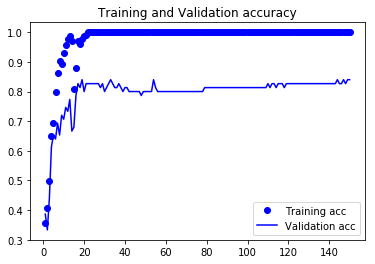

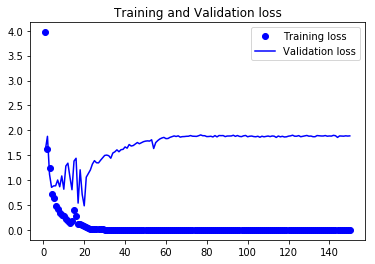

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [17]:
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

from sklearn.metrics import roc_curve, auc
from itertools import cycle
from scipy import interp

n_classes = y_val.shape[1]
y_score = model.predict(x_val)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

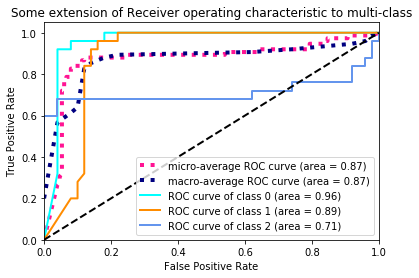

In [18]:

lw = 2
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()